<a href="https://colab.research.google.com/github/habibaezzat18/git-demo/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# New Section

In [ ]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#check duplicates
train.duplicated().sum()
# if there are any duplicates,we will drop them:
#by use: train.drop_duplicates(inplace=True)


np.int64(0)

In [ ]:
#Missing value
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
round(train.isna().mean()*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [78]:
#start deal with missing value
#if mising value less than 5% of the total data,we can drop Rows
#............... more .... 40% ............................ column
#otherwise ,we can impute them
      #train['Embarked'].value_counts()
      #train.dropna(subset=['Embarked'],inplace=True)
train.embarked.fillna(train['embarked'].mode()[0],inplace=True)
round(train.isna().mean()*100,2)

/tmp/ipython-input-3740704821.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.embarked.fillna(train['embarked'].mode()[0],inplace=True)


,0
survived,0.00
pclass,0.00
sex,0.00
age,0.00
sibsp,0.00
parch,0.00
fare,0.00
cabin,77.28
embarked,0.00
age_group,0.00


<Axes: >

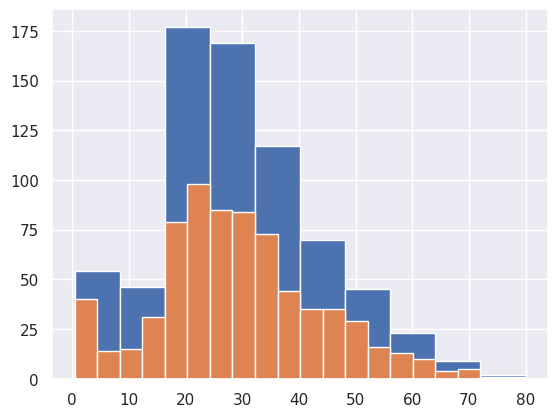

In [ ]:
train.Age.hist()
train['Age'].hist(bins=20)

In [ ]:
train.Age.fillna(train.Age.median(),inplace=True) #not the optimal way to fill missing values

/tmp/ipython-input-2981272259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Age.fillna(train.Age.median(),inplace=True) #not the optimal way to fill missing values


In [ ]:
#we can impute the missing value of age by using (Pclass and Sex)of the passenger
print(train[train['Sex']=='male'].Age.median())

28.0


In [ ]:
print(train[train['Sex']=='female'].Age.median())

28.0


In [ ]:
print(train[train['Pclass']==1].Age.median())
print(train[train['Pclass']==2].Age.median())
print(train[train['Pclass']==3].Age.median())

35.0
28.0
28.0


In [ ]:
train.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    31.5
        male      36.0
2       female    28.0
        male      29.0
3       female    28.0
        male      28.0
Name: Age, dtype: float64

In [ ]:
def impute_age(row):
  if pd.isnull(row['Age']):
     if   (row['Pclass']==1 and row['Sex']=='female'):
           return 31
     elif (row['Pclass']==1 and row['sex']=='male'):
           return 36
     elif (row['Pclass']==2 and row['Sex']=='female'):
           return 28
     elif (row['Pclass']==2 and row['Sex']=='male'):
           return 29
     elif (row['Pclass']==3 and row['Sex']=='female'):
           return 28
     else:
           return 28

  else:
         return row['Age']

train['Age']=train.apply(lambda x : impute_age(x),axis=1)

In [ ]:
# the short and clear way
train['Age']=train.groupby(['Pclass','Sex']).Age.transform(lambda x: x.fillna(x.median()))
round(train.isna().mean()*100,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,0.00
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [ ]:
#by using KNN imputation
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=2)
train[['Age']]=imputer.fit_transform(train[['Age']])

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#drop unnecessary columns
train.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [ ]:
#Rename columns
#train.rename(columns={'Survived':'survived','Pclass':'pclass','Sex':'sex','Age':'age','Sibsp':'sibsp','Parch':'parch','Fare':'fare','Embarked':'embarked'})
train.columns=train.columns.str.lower()
train.sample()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
219,0,2,male,30.0,0,0,10.5,NaN,S


# Univariate Analysis

In [ ]:
train.survived.value_counts()

,count
survived,
0,549
1,340


In [ ]:
train.survived.value_counts()/ len(train)
train.survived.value_counts(normalize=True)

,proportion
survived,
0,0.617548
1,0.382452


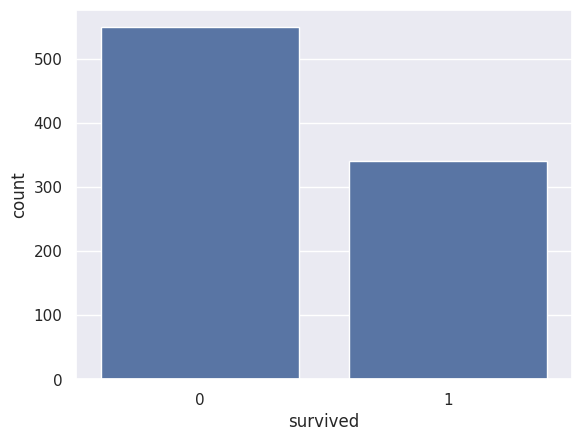

In [ ]:
sns.countplot(x='survived',data=train);

In [ ]:
train.pclass.value_counts()

,count
pclass,
3,491
1,214
2,184


In [ ]:
train.pclass.value_counts(normalize=True)

,proportion
pclass,
3,0.552306
1,0.240720
2,0.206974


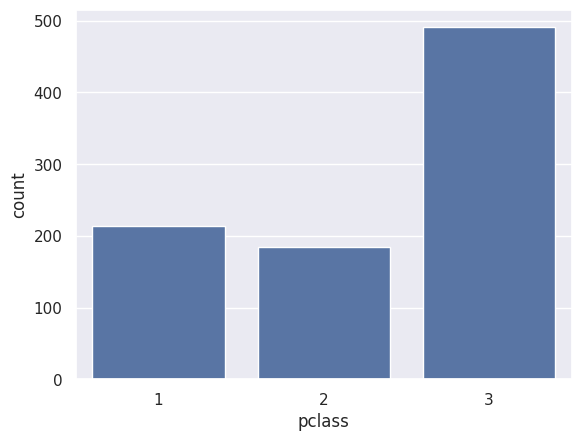

In [ ]:
sns.countplot(x='pclass',data=train);

****pclass****
pclass
3    0.552306
1    0.240720
2    0.206974
Name: proportion, dtype: float64


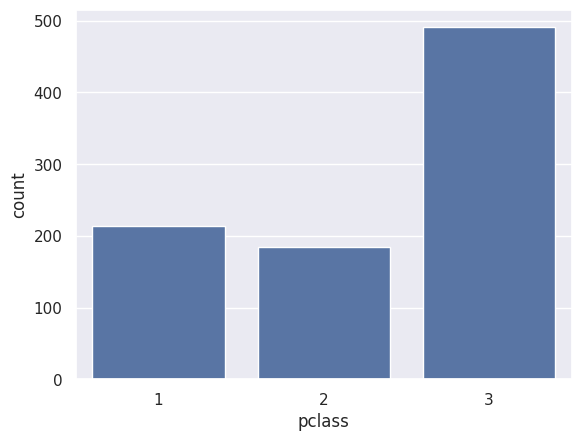

****sibsp****
sibsp
0    0.681665
1    0.235096
2    0.031496
4    0.020247
3    0.017998
8    0.007874
5    0.005624
Name: proportion, dtype: float64


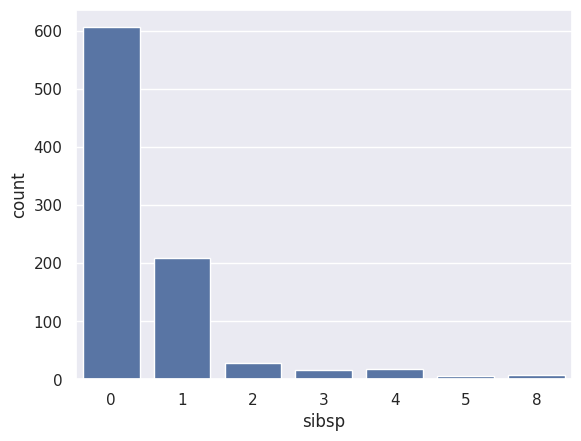

****parch****
parch
0    0.760405
1    0.132733
2    0.089989
5    0.005624
3    0.005624
4    0.004499
6    0.001125
Name: proportion, dtype: float64


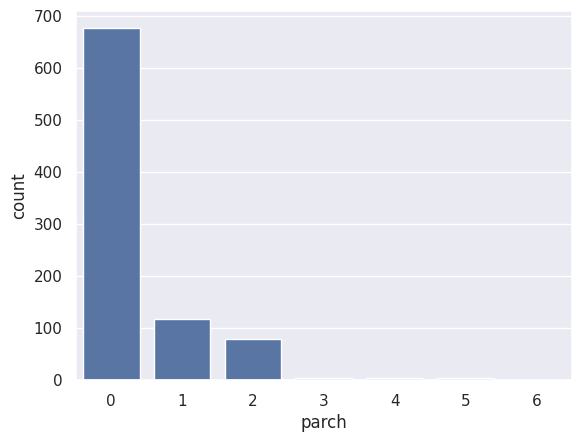

****sex****
sex
male      0.649044
female    0.350956
Name: proportion, dtype: float64


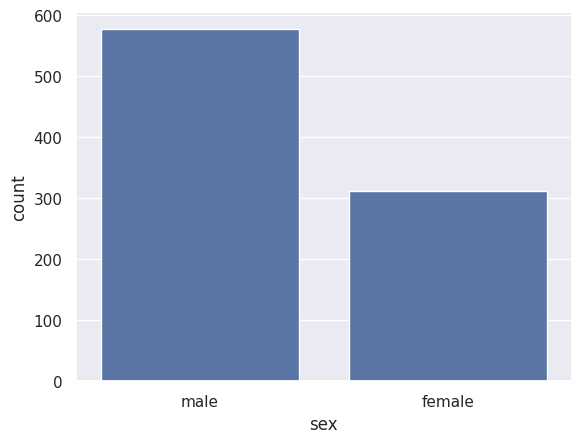

****embarked****
embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64


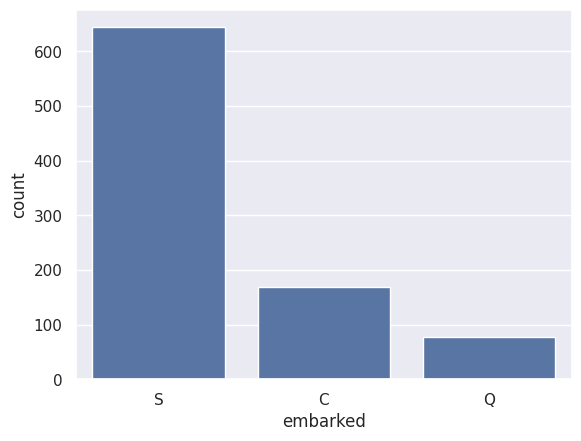

In [ ]:
def explore_categorical(train,col):
  print(f'****{col}****')
  print(train[col].value_counts(normalize=True))
  sns.countplot(x=col,data=train)
  plt.show()

for col in ['pclass','sibsp','parch','sex','embarked']:
  explore_categorical(train,col)


**** fare ****
count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


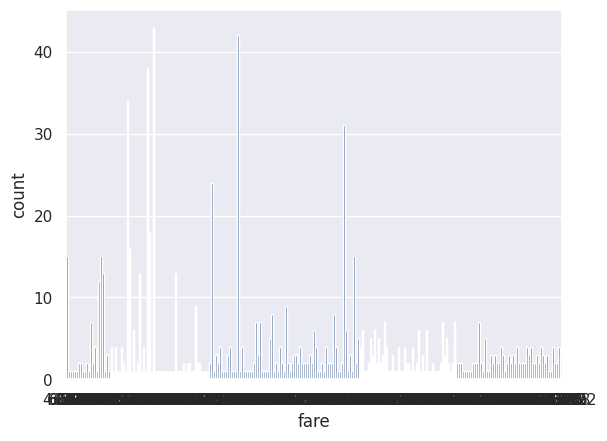

**** age ****
count    889.000000
mean      29.315152
std       12.984932
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64


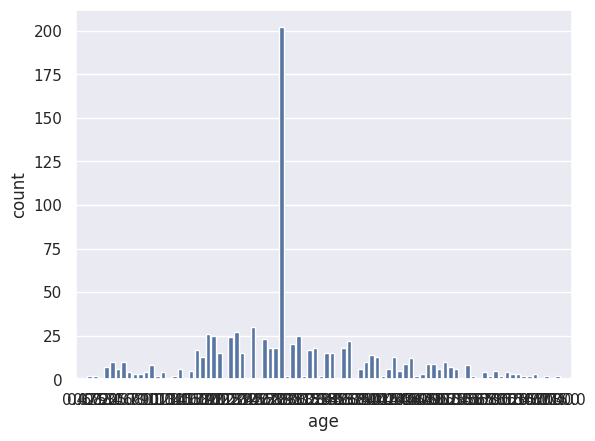

In [ ]:
def explore_continuous(train,col):
  print(f'**** {col} ****')
  print(train[col].describe())
  sns.countplot(x=col,data=train)
  plt.show()

for col in ['fare','age']:
  explore_continuous(train,col)

# Bivariate Analysis

In [ ]:
train.sample()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked
278,0,3,male,7.0,4,1,29.125,NaN,Q


In [ ]:
train.groupby('pclass').survived.mean()

,survived
pclass,
1,0.626168
2,0.472826
3,0.242363


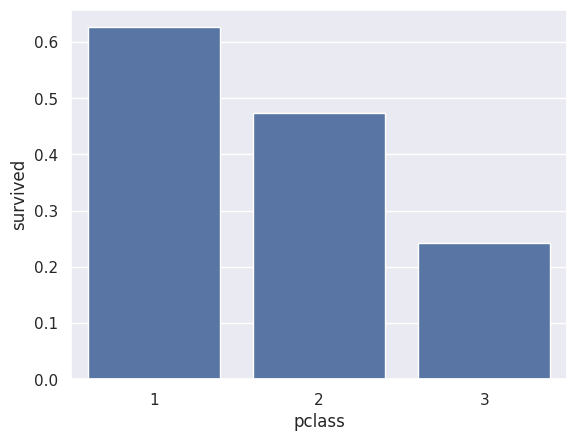

In [ ]:
sns.barplot(data=train,x='pclass',y='survived',errorbar=None);

In [106]:
train['family_size']=train['parch']+train['sibsp']+1


pclass
1    0.626168
2    0.472826
3    0.242363
Name: survived, dtype: float64


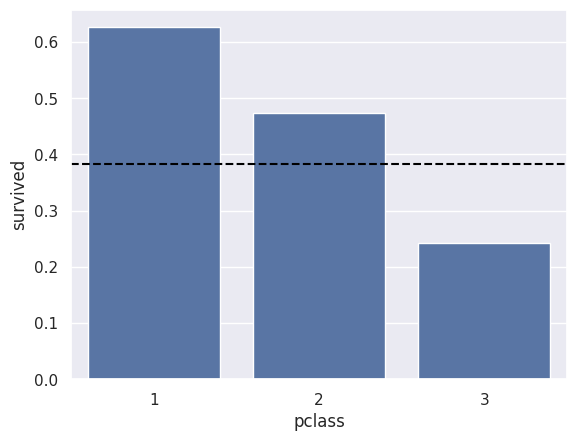

sibsp
0    0.343234
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


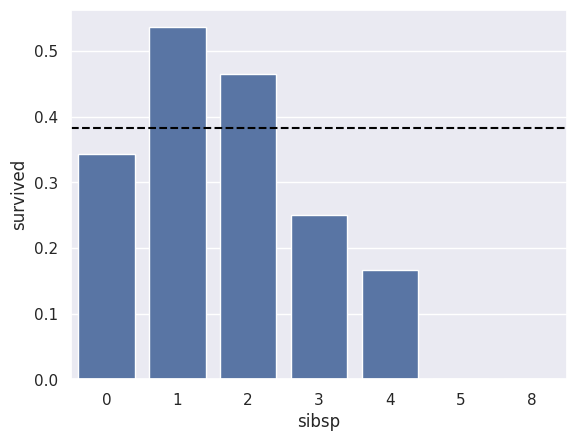

sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


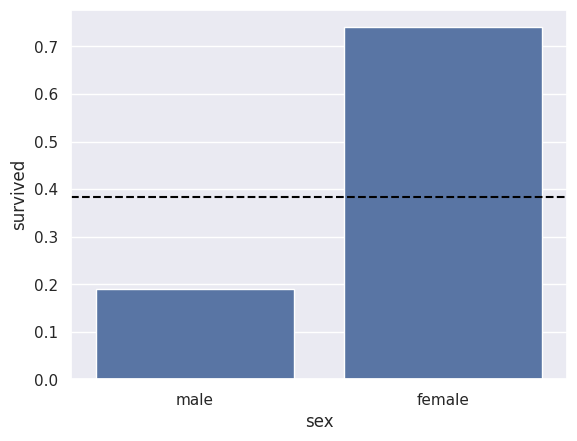

parch
0    0.341716
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


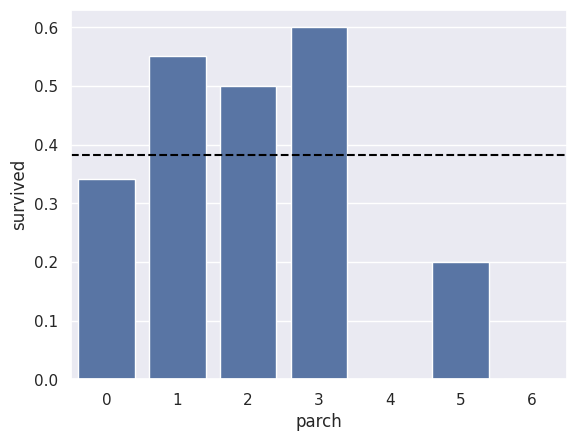

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


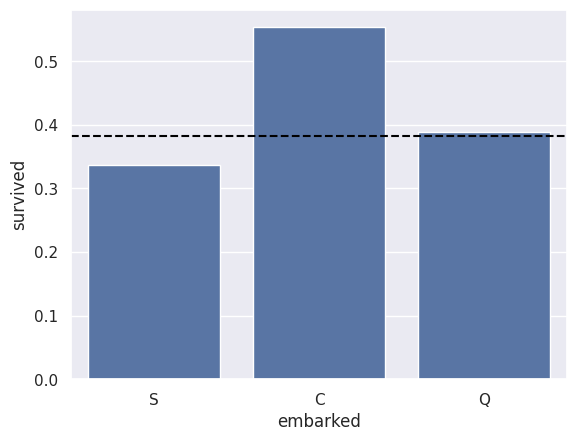

family_size
1     0.300935
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64


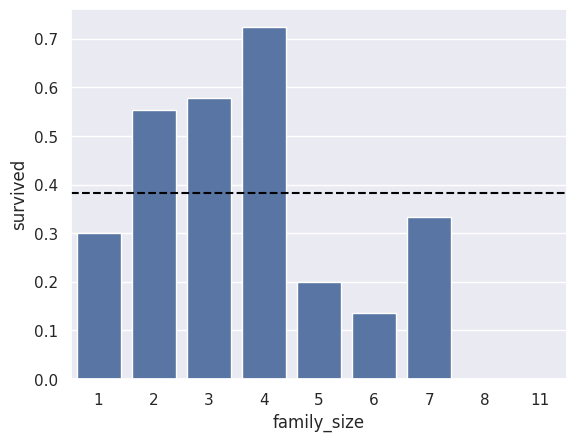

In [107]:
#survived rate for each group
def survived_rate(train,col):
  print(train.groupby(col).survived.mean())
  sns.barplot(x=col,y='survived',data=train,errorbar=None)
  plt.axhline(train.survived.mean(), color='black', linestyle='--')
  plt.show()

for col in ['pclass','sibsp','sex','parch','embarked','family_size']:
  survived_rate(train,col)


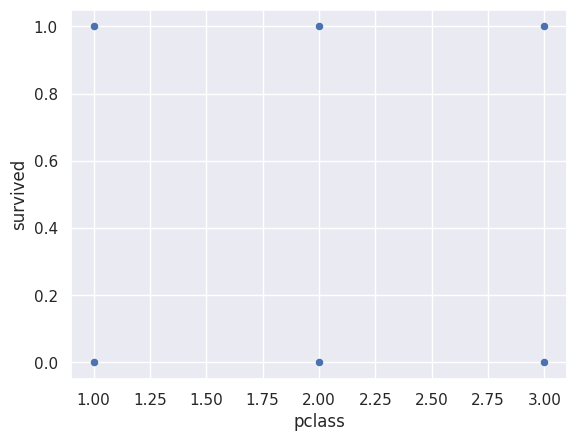

In [ ]:
sns.scatterplot(data=train,x='pclass',y='survived');

<Axes: xlabel='pclass', ylabel='survived'>

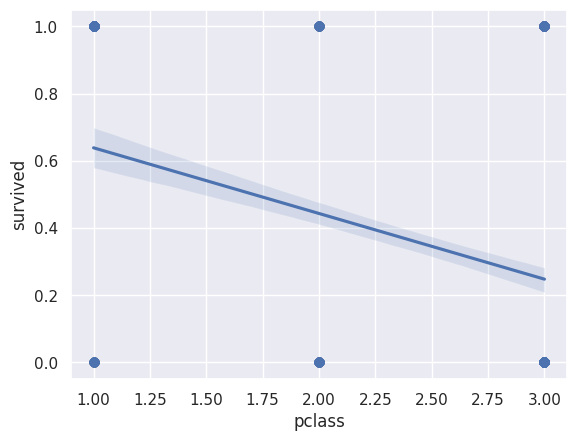

In [ ]:
sns.regplot(data=train,x='pclass',y='survived');

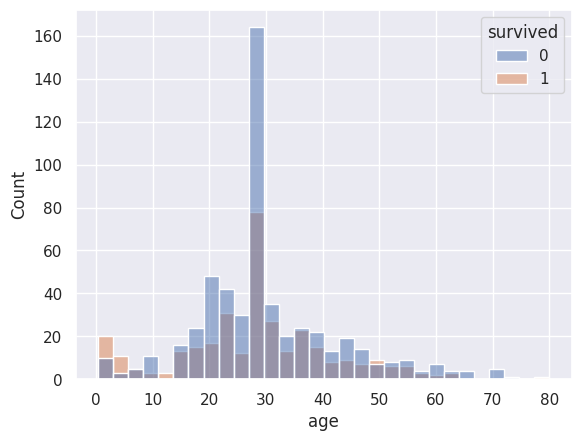

In [ ]:
sns.histplot(x='age',data=train,hue='survived');

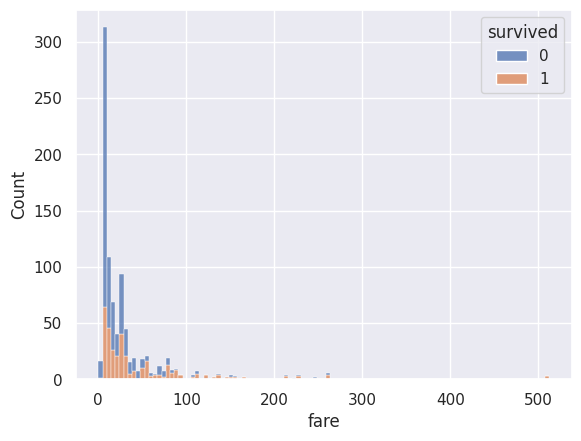

In [ ]:
sns.histplot(x='fare',hue='survived',multiple='stack',data=train);

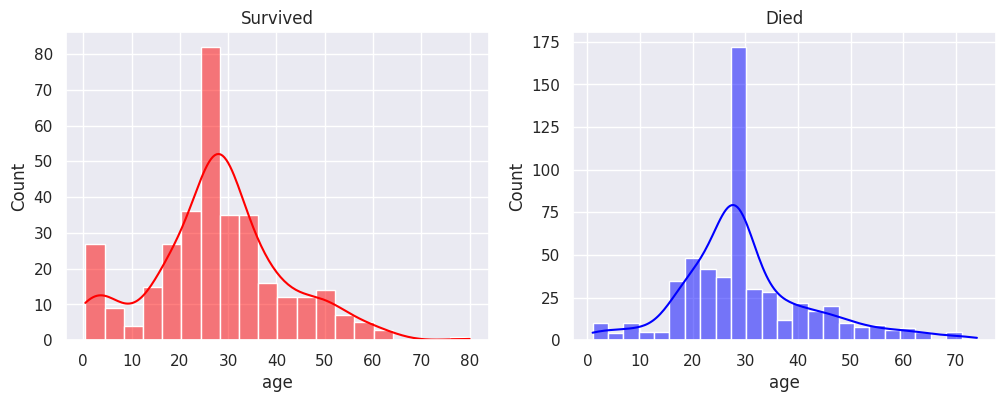

In [ ]:
train_survived=train[train.survived==1]
train_died=train[train.survived==0]
#subplots for age distribution
fig,ax=plt.subplots(1,2,figsize=(12,4))
sns.histplot(x='age',data=train_survived,ax=ax[0],kde=True,color='red')
sns.histplot(x='age',data=train_died,ax=ax[1],kde=True,color='blue')
ax[0].set_title('Survived')
ax[1].set_title('Died')
plt.show()

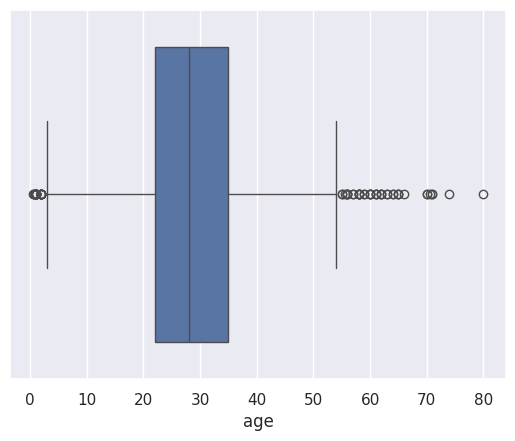

In [ ]:
sns.boxplot(data=train,x='age');

# Detect outlier

<Axes: xlabel='fare'>

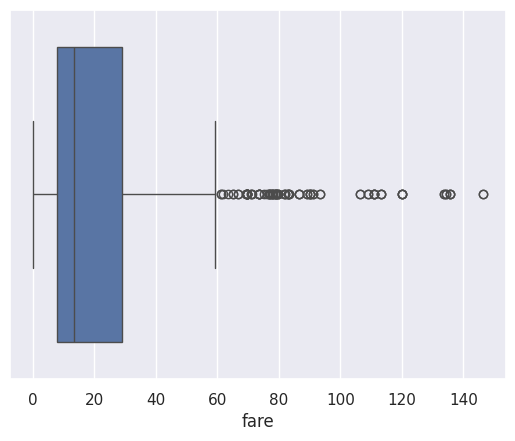

In [ ]:
#Remove outliers
def remove_outliers(train,col):
  q1=train[col].quantile(0.25)
  q3=train[col].quantile(0.75)
  iqr=q3-q1
  lower_fence=q1-(1.5*iqr)
  upper_fence=q3+(1.5*iqr)
  return train[(train[col]>lower_fence and train[col]<upper_fence)]

train1=train[train.fare<150]
#train1=remove_outliers(train,'fare')
sns.boxplot(data=train1,x='fare')

<Axes: xlabel='fare'>

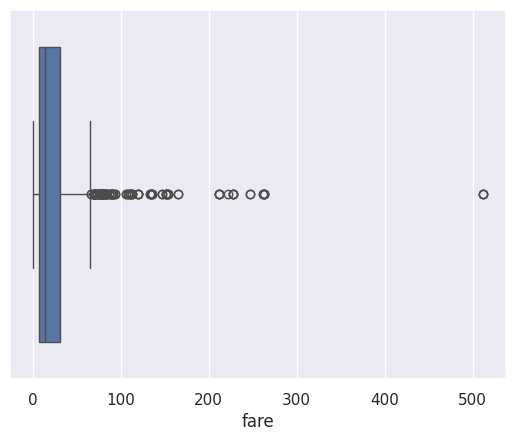

In [ ]:
sns.boxplot(x='fare',data=train)

In [ ]:
#Split Age into groups
train['age_group']=pd.cut(train.age,bins=[0,22,27,37,82],labels=['child','young','adult','senior'])
#split fare into groups
train['fare_group']=pd.cut(train.fare,bins=[-0,8,15,35,265],labels=['low','medium','high','very high'])

age_group
child     0.424242
young     0.405660
adult     0.355191
senior    0.370968
Name: survived, dtype: float64


/tmp/ipython-input-2081797675.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(col).survived.mean())


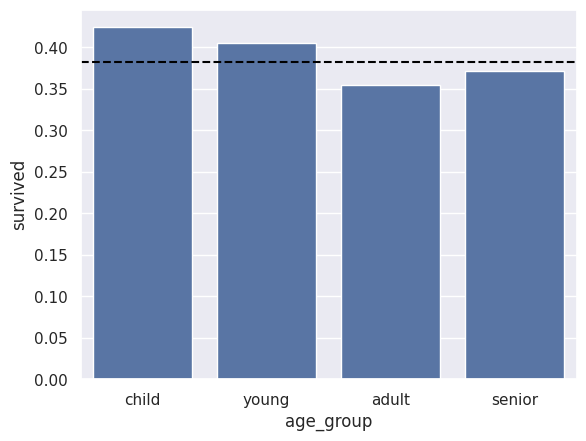

/tmp/ipython-input-2081797675.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(col).survived.mean())


fare_group
low          0.225664
medium       0.285714
high         0.446809
very high    0.611399
Name: survived, dtype: float64


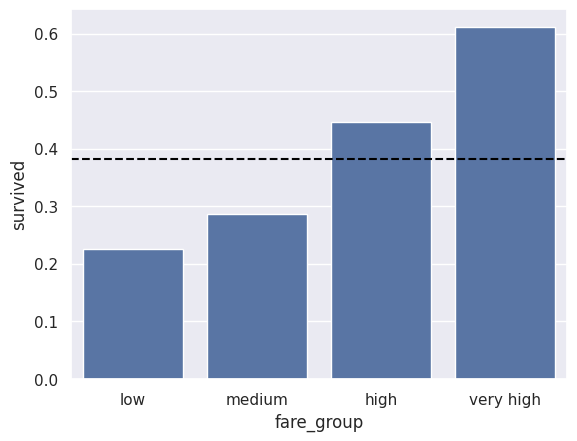

In [ ]:
for col in ['age_group','fare_group']:
  survived_rate(train,col)

In [84]:
train.groupby(['parch','sibsp']).survived.mean()

parch  sibsp
0      0        0.300935
       1        0.520325
       2        0.250000
       3        1.000000
1      0        0.657895
       1        0.596491
       2        0.857143
       3        0.000000
       4        0.000000
2      0        0.724138
       1        0.631579
       2        0.500000
       3        0.285714
       4        0.333333
       5        0.000000
       8        0.000000
3      0        1.000000
       1        0.333333
       2        1.000000
4      0        0.000000
       1        0.000000
5      0        0.000000
       1        0.333333
6      1        0.000000
Name: survived, dtype: float64

In [95]:
train.sample()

,survived,pclass,sex,age,sibsp,parch,fare,cabin,embarked,age_group,fare_group,family_size
591,1,1,female,52.0,1,0,78.2667,D20,C,senior,very high,2


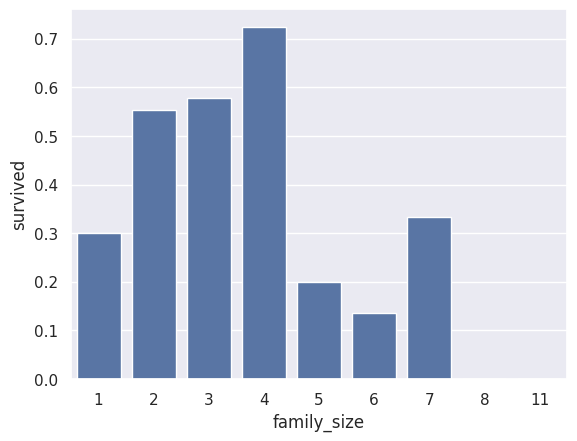

In [100]:
sns.barplot(x='family_size',y='survived',data=train,errorbar=None);

In [117]:
# passenger_alone
train.family_size.value_counts()[1]


np.int64(535)

In [123]:
train[train['family_size']==1].survived.mean()

np.float64(0.30093457943925234)

In [126]:
train.groupby('family_size').survived.mean().sort_values()

,survived
family_size,
8,0.000000
11,0.000000
6,0.136364
5,0.200000
1,0.300935
7,0.333333
2,0.552795
3,0.578431
4,0.724138


In [128]:
train.groupby('family_size').survived.mean().sort_values(ascending=False).head(3)
#train.groupby('family_size').survived.mean().nlargest(3)

,survived
family_size,
4,0.724138
3,0.578431
2,0.552795


# Multivariate Analysis

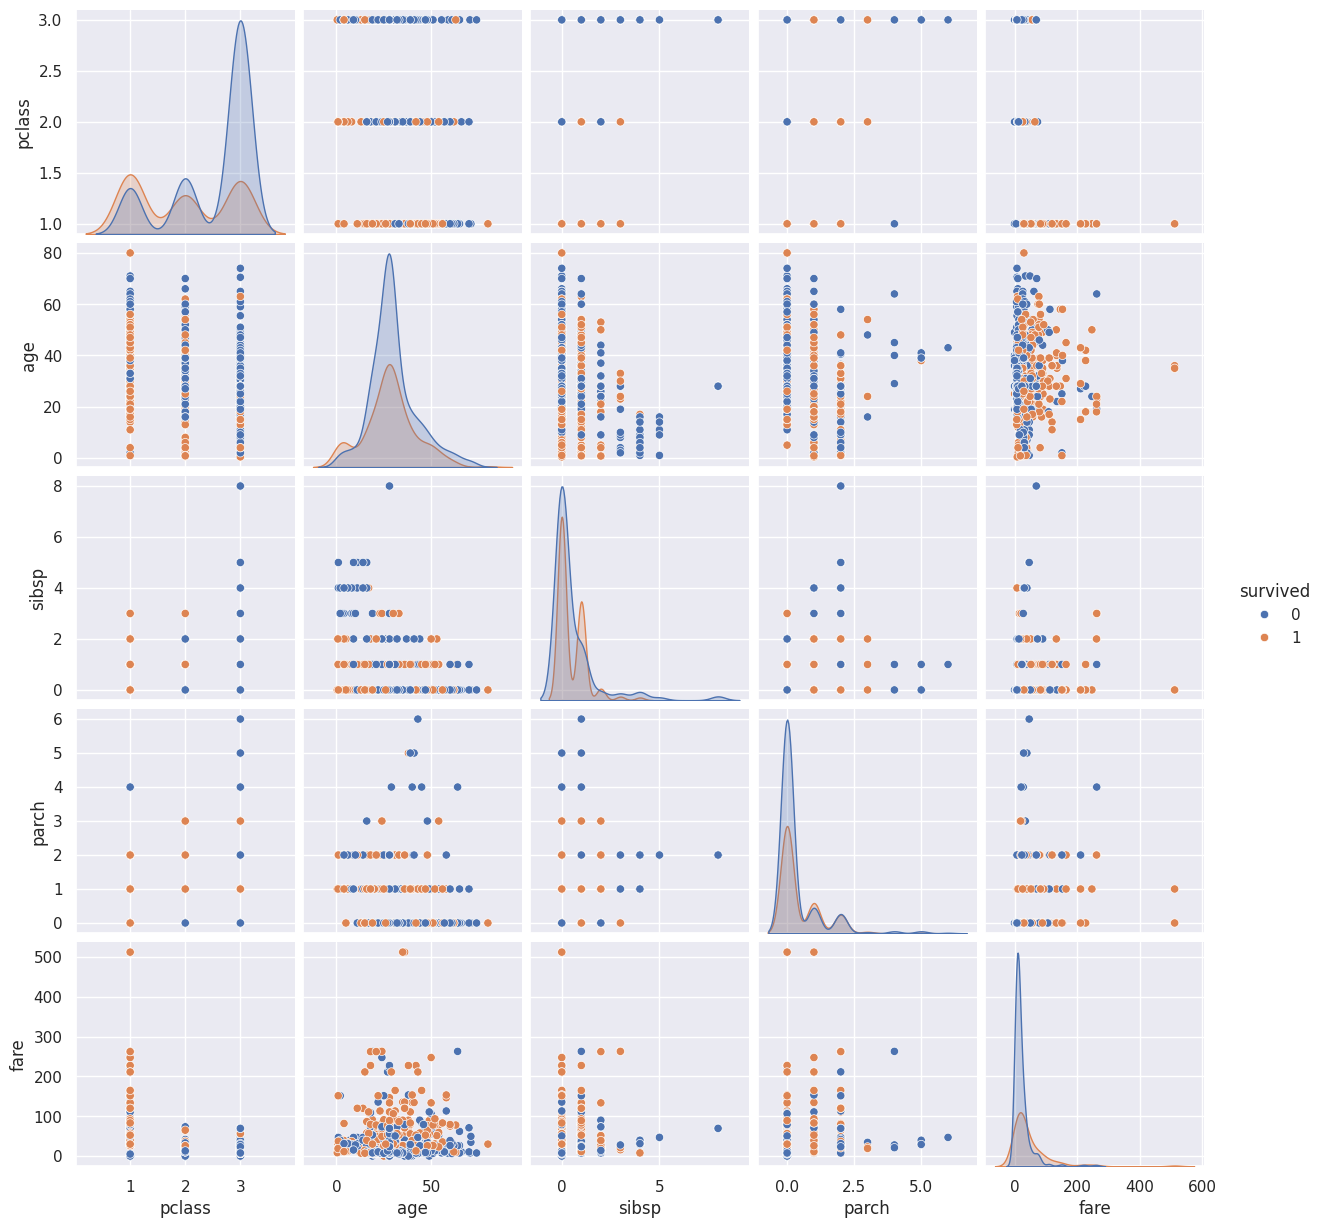

In [ ]:
sns.pairplot(train,hue='survived')

In [ ]:
train.corr(numeric_only=True)

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290
pclass,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193
age,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707
sibsp,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887
parch,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532
fare,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000


In [ ]:
train.corr(numeric_only=True)['survived']

,survived
survived,1.000000
pclass,-0.335549
age,-0.069822
sibsp,-0.034040
parch,0.083151
fare,0.255290


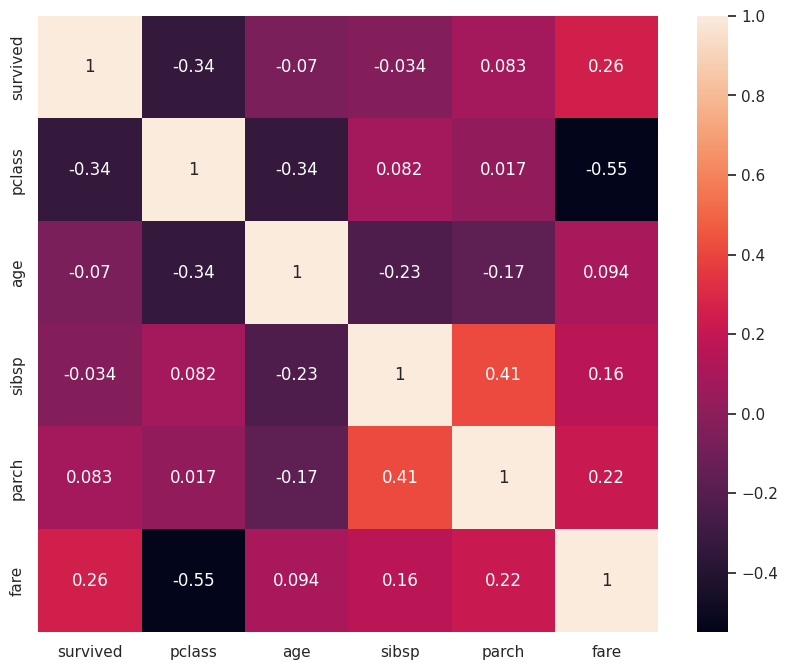

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(numeric_only=True), annot=True);

<Axes: xlabel='pclass', ylabel='survived'>

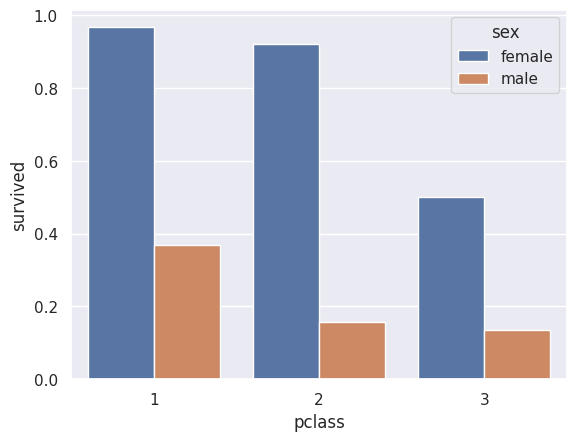

In [ ]:
sns.barplot(x='pclass',y='survived',hue='sex',data=train,errorbar=None)

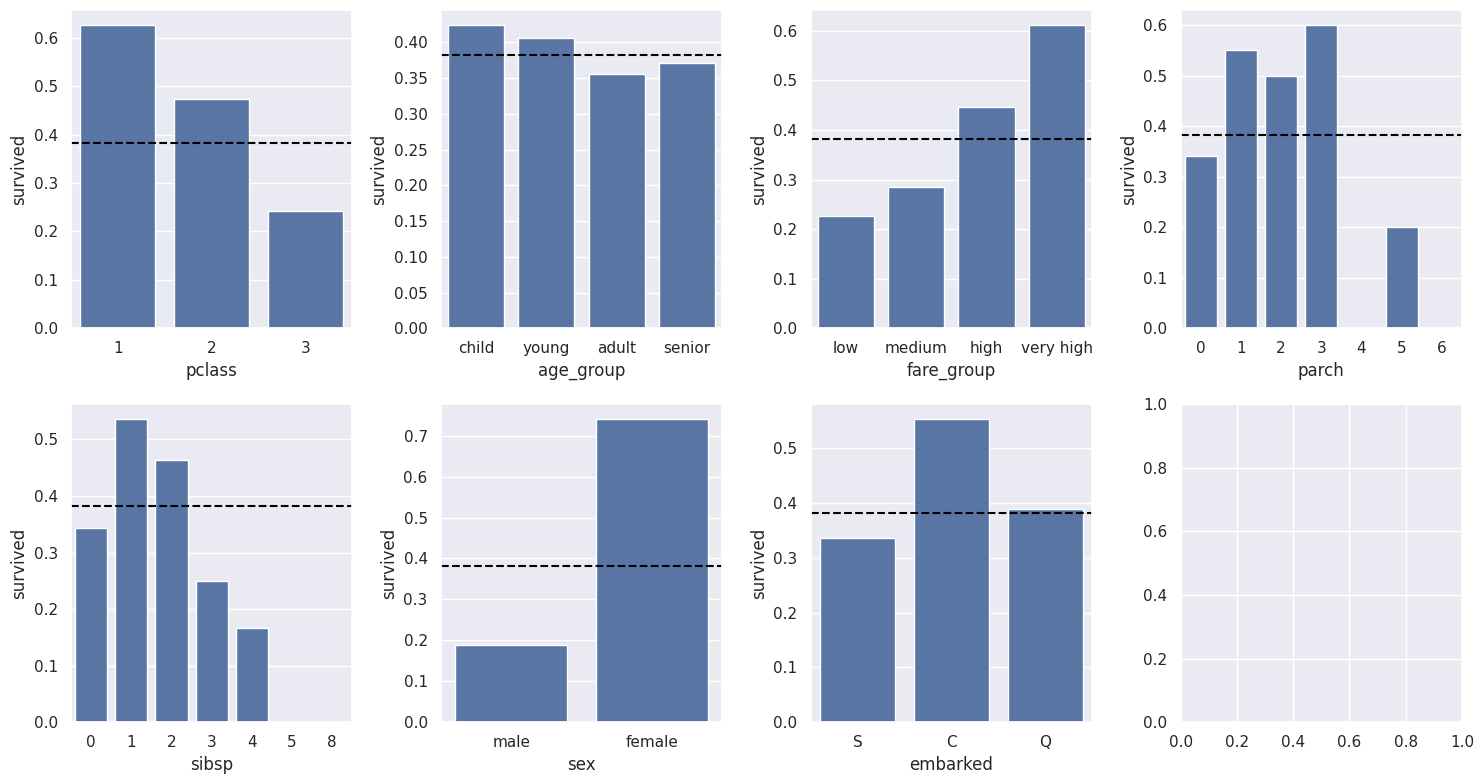

In [ ]:
#conclusion
fig,ax=plt.subplots(2,4,figsize=(15,8))
for i,col in enumerate(['pclass','age_group','fare_group','parch','sibsp','sex','embarked']):
  sns.barplot(x=col,y='survived',data=train,ax=ax[i//4, i%4],errorbar=None)
  ax[i//4, i%4].axhline(train.survived.mean(), color='black', linestyle='--')

plt.tight_layout()
plt.show()

In [ ]:
female_train=train[train['sex']=='female']
male_train=train[train['sex']=='male']

In [ ]:
female_train.survived.value_counts()

,count
survived,
1,231
0,81


In [ ]:
female_train.groupby('pclass').survived.mean()

,survived
pclass,
1,0.967391
2,0.921053
3,0.500000


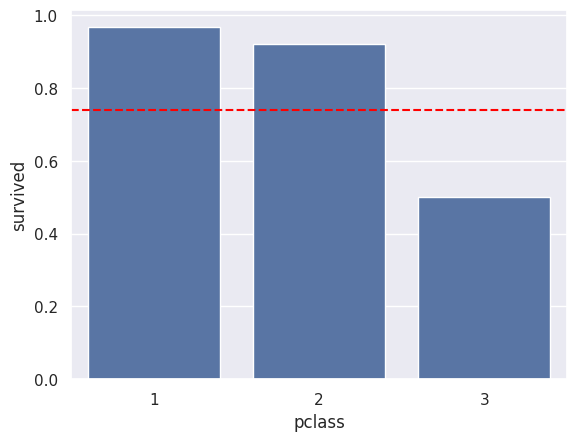

In [ ]:
sns.barplot(x='pclass',y='survived',data=female_train,errorbar=None);
plt.axhline(female_train.survived.mean(),color='red',linestyle='--')
plt.show()

In [ ]:
male_train.survived.value_counts()

,count
survived,
0,468
1,109


In [ ]:
male_train.groupby('pclass').survived.mean()

,survived
pclass,
1,0.368852
2,0.157407
3,0.135447


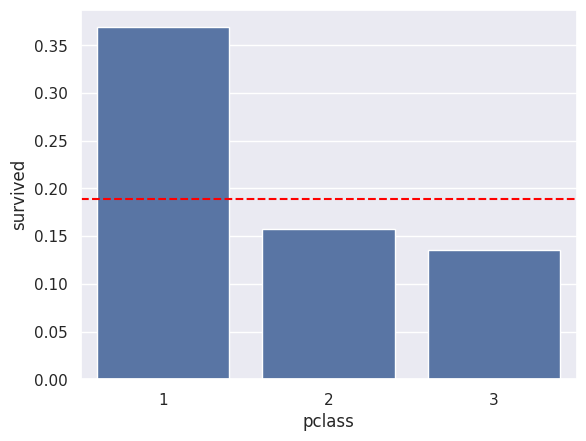

In [ ]:
sns.barplot(x='pclass',y='survived',data=male_train,errorbar=None);
plt.axhline(male_train.survived.mean(),color='red',linestyle='--')
plt.show()

In [ ]:
sex_class=pd.merge(female_train.groupby('pclass').survived.mean(),male_train.groupby('pclass').survived.mean(),on='pclass')
sex_class

,survived_x,survived_y
pclass,,
1,0.967391,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [ ]:
sex_class.rename(columns={'survived_x':'female_survived','survived_y':'male_survived'},inplace=True)
sex_class

,female_survived,male_survived
pclass,,
1,0.967391,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [ ]:
train.groupby(['pclass','sex']).survived.mean()

pclass  sex   
1       female    0.967391
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64